In [221]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from dark_matter_mass_v1 import rot_fit_BB

# Data

In [235]:
# New fit (with parameter penalty)
filename = '../spirals/Pipe3D-master_file_vflag_BB_chi10_alpha10_smooth2p27_N2O2_noWords.txt'
data = Table.read(filename, format='ascii.commented_header')

# Fit using scipy.optimize.minimize (no parameter penalty)
minimize_filename = '../spirals/Pipe3D-master_file_vflag_BB_minimize_chi10_smooth2p27_N2O2_noWords.txt'
minimize_data = Table.read(filename, format='ascii.commented_header')

# Original fit (using scipy.optimize.curve_fit)
no_penalty_filename = '../spirals/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt'
no_penalty_data = Table.read(no_penalty_filename, format='ascii.commented_header')

#### Collect $R_{turn}$, $V_{max}$ for each galaxy based on which rotation curve was used for the final analysis

In [238]:
def best_fit_parameters(data_table):
    '''
    Collect the parameters corresponding to the best fit for each galaxy.
    
    
    PARAMETERS
    ==========
    
    data_table : astropy table
        Data table containing each galaxy in its own row
        
        
    RETURNS
    =======
    
    data_table : astropy table
        Same as input table, but with additional columns:
          - 'r_turn_used'     : Rturn parameter corresponding to 'curve_used' fit
          - 'v_max_used'      : Vmax parameter corresponding to 'curve_used' fit
          - 'v_max_data_used' : Maximum velocity measured in 'curve_used' curve
          - 'alpha_used'      : Alpha parameter corresponding to 'curve_used' fit
          - 'chi2ndf_used'    : Normalized chi2 corresponding to 'curve_used' fit
    '''
    N = len(data_table)
    
    data_table['r_turn_used'] = np.NaN*np.ones(N, dtype=float)
    data_table['v_max_used'] = np.NaN*np.ones(N, dtype=float)
    data_table['v_max_data_used'] = np.NaN*np.ones(N, dtype=float)
    data_table['alpha_used'] = np.NaN*np.ones(N, dtype=float)
    data_table['chi2ndf_used'] = np.NaN*np.ones(N, dtype=float)

    for i in range(N):
        curve_used = data_table['curve_used'][i]

        # Positive rotation curve
        if curve_used == 1:
            data_table['r_turn_used'][i] = data_table['pos_r_turn'][i]
            data_table['v_max_used'][i] = data_table['pos_v_max'][i]
            data_table['v_max_data_used'][i] = data_table['pos_Vmax_data'][i]
            data_table['alpha_used'][i] = data_table['pos_alpha'][i]
            data_table['chi2ndf_used'][i] = data_table['pos_chi_square_ndf'][i]
        elif curve_used == 0:
            data_table['r_turn_used'][i] = data_table['avg_r_turn'][i]
            data_table['v_max_used'][i] = data_table['avg_v_max'][i]
            data_table['v_max_data_used'][i] = data_table['avg_Vmax_data'][i]
            data_table['alpha_used'][i] = data_table['avg_alpha'][i]
            data_table['chi2ndf_used'][i] = data_table['avg_chi_square_ndf'][i]
        elif curve_used == -1:
            data_table['r_turn_used'][i] = data_table['neg_r_turn'][i]
            data_table['v_max_used'][i] = data_table['neg_v_max'][i]
            data_table['v_max_data_used'][i] = np.abs(data_table['neg_Vmax_data'][i])
            data_table['alpha_used'][i] = data_table['neg_alpha'][i]
            data_table['chi2ndf_used'][i] = data_table['neg_chi_square_ndf'][i]
            
    return data_table

In [239]:
data = best_fit_parameters(data)
minimize_data = best_fit_parameters(minimize_data)
no_penalty_data = best_fit_parameters(no_penalty_data)

In [240]:
print('Vmax (data) range:', np.nanmin([data['pos_Vmax_data'], data['neg_Vmax_data'], data['avg_Vmax_data']]), 
      np.nanmax([data['pos_Vmax_data'], data['neg_Vmax_data'], data['avg_Vmax_data']]))
print('Vmax (data) range used:', np.nanmin(data['v_max_data_used']), np.nanmax(data['v_max_data_used']))
print('Vmax (fit) range:', np.nanmin(data['v_max_used']), np.nanmax(data['v_max_used']))

Vmax (data) range: -2240.78611646367 20460.290396647433
Vmax (data) range used: 1.8996666111774376 3305.47113473005
Vmax (fit) range: 5.897766546238997 16808.145509238726


In [241]:
print('Rmax range:', data['Rmax'].min(), data['Rmax'].max())
print('Rturn range:', np.nanmin(data['r_turn_used']), np.nanmax(data['r_turn_used']))

Rmax range: -1.0 143.88961678118082
Rturn range: 0.001 100.0


In [242]:
print('Alpha range:', np.nanmin(data['alpha_used']), np.nanmax(data['alpha_used']))

Alpha range: 0.1245881755525058 100.0


In [243]:
data['Rmax_Rturn_ratio'] = data['Rmax']/data['r_turn_used']
data['Vmax_data_fit_ratio'] = data['v_max_data_used']/data['v_max_used']

# Relationship between $R_{max}$ and $R_{turn}$

Regina noticed that there is an unusually high number of galaxies with $\frac{R_{max}}{R_{turn}} = 4$.  Can I replicate this, and if so, what is causing this?

This is due to the lower bound on $R_{turn}$ being set to `0.25*r_turn_guess`, where `r_turn_guess` is equal to the radius of the maximum measured velocity.  Because the measured maximum velocity is often at $R_{max}$, this lower bound is often equal to $0.25R_{max}$.  This lower bound has been set to 0 instead.

<IPython.core.display.Javascript object>


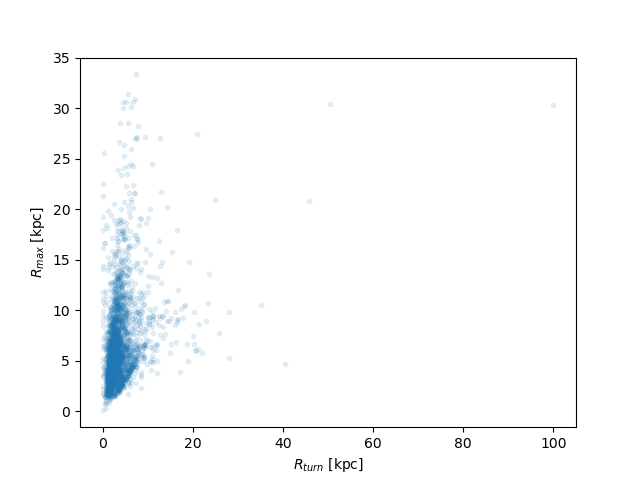

In [219]:
%matplotlib notebook

plt.figure()

#plt.plot([0,30], [0,120], alpha=0.1)
plt.plot(data['r_turn_used'], data['Rmax'], '.', alpha=0.1)

#plt.xlim(xmin=0)

plt.ylabel('$R_{max}$ [kpc]')
plt.xlabel('$R_{turn}$ [kpc]');

<IPython.core.display.Javascript object>


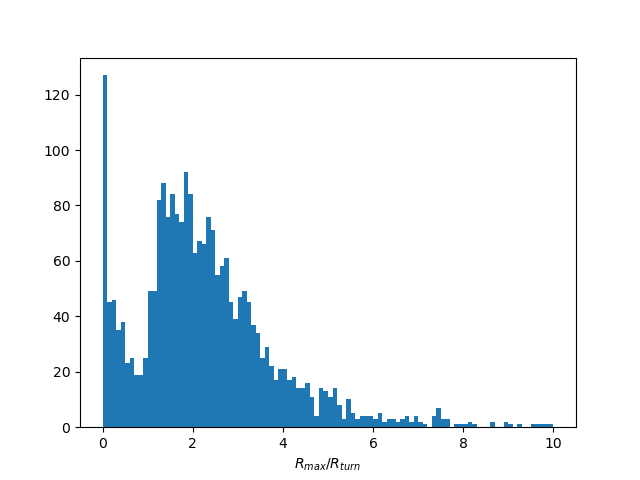

In [202]:
%matplotlib notebook

plt.figure()

plt.hist(data['Rmax_Rturn_ratio'], bins=100, range=(0,10))

plt.xlabel('$R_{max}$/$R_{turn}$');

In [211]:
counts, bin_edges = np.histogram(data['Rmax_Rturn_ratio'], bins=100, range=(0,10))

In [212]:
print(counts)
print(bin_edges)

[127  45  46  35  38  23  25  19  19  25  49  49  82  88  76  84  77  74
  92  84  63  67  66  76  71  55  58  61  45  39  47  49  45  37  34  25
  29  22  17  21  21  17  18  14  14  16  11   4  14  13  11  14   8   3
  10   5   3   4   4   4   3   5   2   3   3   2   3   4   2   4   2   1
   0   4   7   3   3   0   1   1   1   2   1   0   0   0   2   0   0   2
   1   0   1   0   0   1   1   1   1   1]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [167]:
galaxies_with_ratio_between_0p6and0p8 = np.logical_and(data['Rmax_Rturn_ratio'] >= 0.6, 
                                                       data['Rmax_Rturn_ratio'] <= 0.8)

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


In [168]:
data[galaxies_with_ratio_between_0p6and0p8]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used,Rmax_Rturn_ratio,Vmax_data_fit_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9033,1901,1048,290,52736,209476,222.53845118881753,47.31693454669613,0.4816390573978424,16.925079345703125,0.018516622483730316,492987648.0,1.0,50.01134376574669,24.13509189314546,5.502621798631818,6.774187755087205,0.22655864140792006,32.44375858248355,16.99509020183258,6.018857849137636,5.185716685608511,4.063231931559455,48.53623025800406,5.795901754893673,6.798193423254357,11.239682010616761,1.7144607999440582,0.12115845084190369,0.00290147739464074,939040992.8077826,906347998.3720464,-666051550.7710485,906347998.3720464,1605092543.5788312,-0.4149614633969774,0.5646702440914634,-17.877267837524414,2.508162369347992,1.2345804163315592,2.6952019776758576,1.4255443739253058,1.6907269273894492,0.2176221988085723,-1.2744450805705494,1.095135870559391,1.0,0,0,0.07551954713597335,1.3544106438531518,0.571486933314686,1380810,-99.0,1.2103984504938126,0.023809523809523808,1.614762266796911,0.5850385366030226,0.5646702440914634,1.1524966568896995,23.51835195172347,32.94721555474243,-4.523838086286958,2.508162369347992,50.01134376574669,32.94721555474243,5.502621798631818,0.643802923818156,0.6587948468065026
8462,3703,1276,149,53035,246403,146.42274855860532,37.451285541014165,0.9052937030792236,94.37518310546875,0.022340497002005577,658126464.0,0.0,292.6595852724313,147.15735141592236,11.619279179448498,7.104292766715188,48.886976025101575,267.7719518004196,202.5753640269443,12.22349864383864,55.005449286807746,133.9757194343876,570.108297174543,642.5243692662772,1.1558980743645202,0.7057867092849656,113.41386728858437,0.03890630975365639,0.00125380625662689,64662548491.04091,65028243412.9983,61962141032.565094,65028243412.9983,2700407458.4758186,22.945478408483645,24.08090053554435,-18.05117416381836,4.349596718579843,2.3409777294068683,4.459963832827352,3.43220699560489,6.190858831991733,7.009487374963029,-99.0,-99.0,1.0,0,2,9.777395205020316,26.79514388687752,22.682773457716873,1228492,-99.0,1.3495118916034698,0.013220018885741265,3.2470456938556307,23.945478408483645,24.08090053554435,0.9845141251121412,263.04203377881606,455.7319059271364,-19.43192387527381,4.349596718579843,292.6595852724313,455.7319059271364,11.619279179448498,0.7465164942730143,1.5572081997686977
8458,12702,942,358,52703,176671,147.60485430234561,44.257378565214275,0.43321001529693604,81.05023193359375,0.015776436775922775,959062208.0,1.0,237.64783567745468,7.628130968464817,12.916206800957738,10.125386589099016,105.35524199583222,95.69985941870956,20.51974729693274,2.8030520869841213,1.462448597438475,18.82274477083925,376.1281627590308,2.785156765483989,5e-324,0.9888495521700679,4557.990012

<IPython.core.display.Javascript object>


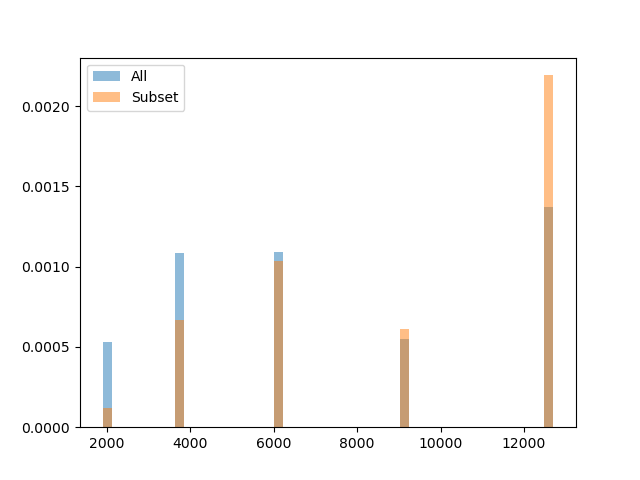

In [97]:
%matplotlib notebook

plt.figure()

field = 'MaNGA_IFU'

plt.hist(data[field], bins=50, density=True, alpha=0.5, label='All')
plt.hist(data[field][galaxies_with_ratio_between_3p9and4p0], bins=50, 
         density=True, alpha=0.5, label='Subset')

plt.legend();

# Distribution in $V_{max}$

Also going to check $V_{max}$ to see if it is being incorrectly influenced by the bounds.

<IPython.core.display.Javascript object>


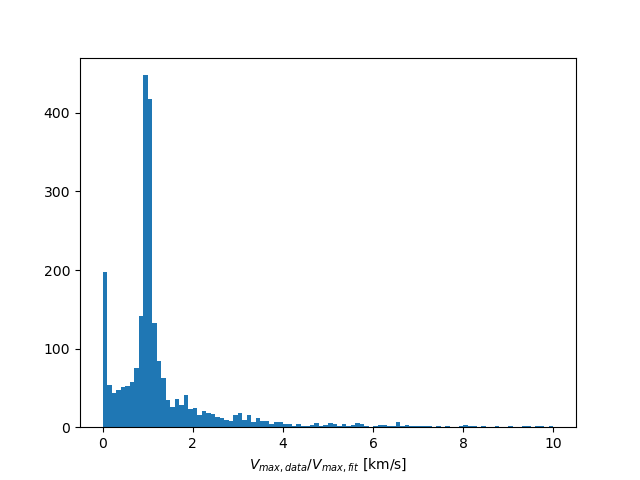

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [205]:
%matplotlib notebook

plt.figure()

plt.hist(data['Vmax_data_fit_ratio'], bins=100, range=(0,10))

plt.xlabel('$V_{max, data}$/$V_{max, fit}$ [km/s]');

Yup, they are: the spikes at $\frac{2}{3}$ and 2 correspond to the maximum and minimum bounds.

<IPython.core.display.Javascript object>


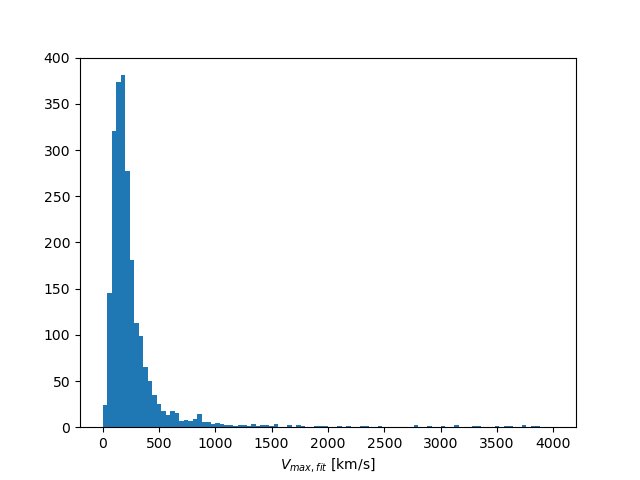

In [206]:
%matplotlib notebook

plt.figure()

plt.hist(data['v_max_used'], bins=100, range=(0,4000))

plt.xlabel('$V_{max, fit}$ [km/s]');

<IPython.core.display.Javascript object>


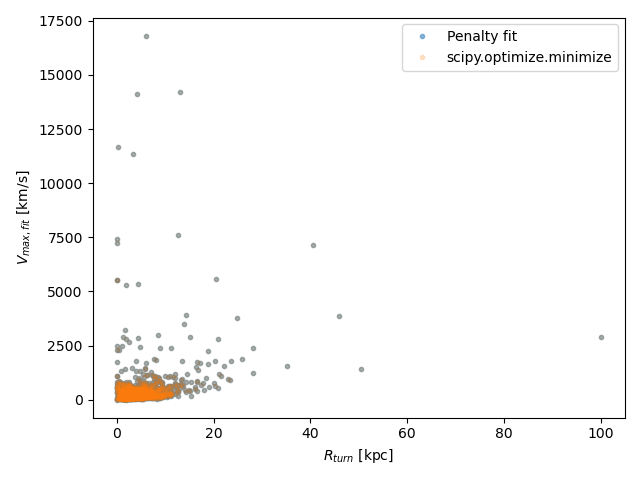

In [253]:
%matplotlib notebook

plt.figure()

#plt.plot(no_penalty_data['r_turn_used'], no_penalty_data['v_max_used'], '.', 
#         alpha=0.2, label='No penalty fit')
plt.plot(data['r_turn_used'], data['v_max_used'], '.', 
         alpha=0.5, label='Penalty fit')
plt.plot(minimize_data['r_turn_used'], minimize_data['v_max_used'], '.', 
         alpha=0.2, label='scipy.optimize.minimize')

plt.xlabel('$R_{turn}$ [kpc]')
plt.ylabel('$V_{max, fit}$ [km/s]')

plt.legend()

plt.tight_layout();

In [173]:
data[data['r_turn_used'] > 90]

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used,Rmax_Rturn_ratio,Vmax_data_fit_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8603,12701,1172,12,52759,222937,248.1405614227537,39.131020684229995,0.6838861703872681,155.978759765625,0.1302715241909027,161279328256.0,-9.0,2904.643858833593,6007.668564609593,0.9915160016779421,0.7587798751310869,73.19125579413029,3136.036709188725,20687.897211545936,0.5767080775320561,0.4808494972256291,267.4446265109416,843.4128466453171,7.277172588357417,16.62451127746234,2.213384651246677,369.7563567505297,0.0407513752579689,0.001074590552368,59427811827182.86,245828827446224.75,59087875534120.43,245828827446224.75,339936293062.43304,173.82043853513542,723.161464260233,-22.182106018066406,100.0,211.71138609452575,100.0,807.2818091979183,27.150899488832934,0.2586801918442362,-99.0,-99.0,-1.0,0,0,5.630096599548484,20.572663577764736,28.442796673117666,1011688,10.15479184443361,2.692919373512268,0.42937685459940655,30.294587743010833,174.82043853513542,723.161464260233,1.8369301861918226,584.5007080150068,723.1434951589272,-72.0535940139602,100.0,2904.643858833593,723.1434951589272,0.9915160016779421,0.3029458774301083,0.24896115679025696


In [123]:
data[data['Rmax_Rturn_ratio'] > 10]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used,Rmax_Rturn_ratio,Vmax_data_fit_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9507,9102,1586,620,52945,316374,128.75356004174125,26.057335972563404,0.5143032073974609,138.95513916015625,0.05865200236439705,31881166848.0,1.0,695.1719441675934,96.60743254182836,0.3719579136147246,0.04689166552331549,5.466257328887662,341.68656910028983,5.220177457883976,2.8699599368460085,0.3794659029572788,81.57133122367495,7067.746142239456,40056.65763794227,0.15418397238049072,1.303576337566968,219.5964611803294,0.14906424283981323,0.00223974246746592,1341003258085.8323,372716083565.64325,1275644200907.0896,372716083565.64325,65359057178.74277,19.51748167692323,5.702592718654831,-20.692506790161133,0.7621412135615461,0.19026403955982413,2.59960924872765,0.04483789937057374,1.0852165145493642,74.03969306642638,-99.0,-99.0,2.0,0,3,0.6832821661109577,10.196416402959368,27.449557647541177,1819583,9.76833665003704,2.419595569372177,0.24472049689440994,11.934561007068032,20.51748167692323,5.702592718654831,2.084196793405633,538.5935837211418,627.1774709076712,-89.7675838116318,0.7621412135615461,695.1719441675934,627.1774709076712,0.3719579136147246,15.659251585801123,0.9021904237787681
7968,12704,989,512,52468,191000,324.2598807538297,0.42824042613348423,0.5208664536476135,66.948486328125,0.05092523619532585,118098518016.0,-9.0,7424.7705487172025,1.0000000000140725,0.1415901112100833,0.15609916453054087,115.97338168432618,387.8913511955864,20.56027233326767,1.8454232778214035,0.7141148095955547,270.8907797056045,19736.38741282604,1.0000022062787894,0.16980916197956003,0.018058117761614208,2414.858118464831,0.13410621881484985,0.00198362337032787,151793644929761.34,41030507861.8113,151567068997087.47,41030507861.8113,226575932673.86978,668.9460226795181,0.1810894360120324,-22.006450653076172,0.06857037518967159,0.9998946025973156,1.7499368229198857,0.20418045735886664,4.663921390971405,4.205398063570086,-99.0,-99.0,4.0,0,0,8.921029360332783,20.8377522850465,185.758316804987,1690063,9.792177234163415,2.934696674346924,0.059656523049111176,11.842642095689751,669.9460226795181,0.1810894360120324,2.0439193417574497,484.14174880986474,497.1692960129419,-180.47570079393276,0.06857037518967159,7424.7705487172025,497.1692960129419,0.1415901112100833,172.70785033525016,0.06696089700695723
8552,12703,1677,405,53148,340823,227.40587281527002,45.13456750445173,0.8779962062835693,26.954559326171875,0.07874185591936111,70477709312.0,1.0,462.4528001204562,13.445671977961489,1.3635671551465771,0.47125672531064206,48.379471347580285,716.3062580164996,1.9713988520801466,2.871710440974866,0.08179253016936684,122.12241784356304,3041.5230168638454,299040.92260837357,0.1584377780

<IPython.core.display.Javascript object>


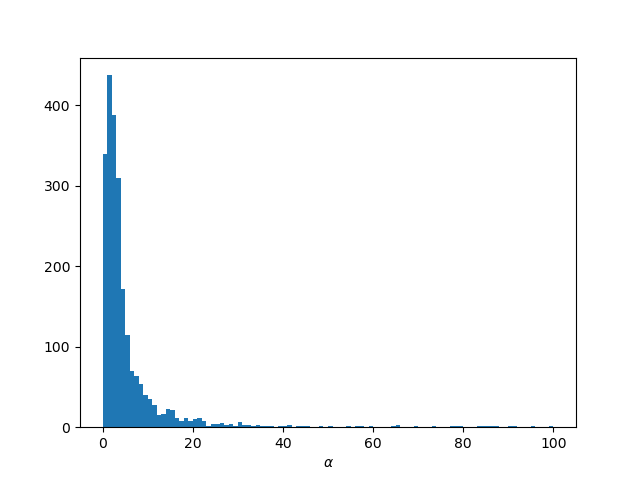

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [209]:
%matplotlib notebook

plt.figure()

plt.hist(data['alpha_used'], bins=100, range=(0,100))

plt.xlabel(r'$\alpha$');

In [175]:
data[data['alpha_used'] > 99]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used,Rmax_Rturn_ratio,Vmax_data_fit_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8254,6103,1434,114,53053,292572,162.98917405174788,44.760131783361714,0.7647742033004761,81.98406982421875,0.1404983550310135,295736934400.0,-9.0,466.9748466188311,15.052480980411895,100.0,21.66608639210849,52.82365117107108,771.2966111386999,19.470973606508934,3.1508630081028346,1.3120305074691367,104.29962472828653,467.2147755614265,6.697649968657511,5e-324,0.9728128378904143,8531.828739539184,0.04837539419531822,0.000963859114425634,1242435759780.479,80097426725.64798,835711089111.1829,80097426725.64798,406724670669.29614,2.0547341958282423,0.19693279631609664,-22.67762565612793,6.265963504626178,0.12787281516792465,7.3183393602491185,0.8701653214107278,0.001,1.3408569348875932,-99.0,-99.0,1.0,0,3,8.80394186184518,17.383270788047756,1421.971456589864,1064610,10.215846149944731,2.542838752269745,0.06571087216248507,24.5046246906484,3.0547341958282423,0.19693279631609664,1.4781714241827846,782.296692256574,743.7507718750105,-24.184479780725763,6.265963504626178,466.9748466188311,743.7507718750105,100.0,3.910751263162731,1.5926998579478053
8458,12703,942,330,52703,176664,148.89783063068683,45.55472250249456,0.34693384170532227,4.35906982421875,0.07250755280256271,45714325504.0,2.0,121.0021963005261,6.436455021562532,100.0,16.095795241033677,9.845243754782407,0.1,1.3041599101812784,5e-324,0.9855437084990412,104.52740444645517,282.2171035993428,2.1245953569864207,8.133617644059218,0.5137506308548911,126.64628255528538,0.04750838130712509,0.000952763839769297,25113212698.50573,2671688159.8779907,589160698.650032,2671688159.8779907,24524051999.855698,0.02402379095646587,0.10894154684934249,-21.370708465576172,2.1112730096911867,0.05963466955337011,0.0010000000000047748,0.8261173364560201,3.3056676467847987,0.035653802872010615,-99.0,-99.0,2.0,0,3,9.845243754782407,104.52740444645517,126.64628255528538,842707,9.11023481615577,2.348286956548691,0.3927392739273927,7.376950295909024,1.0240237909564658,0.10894154684934249,1.9391375756546443,143.79792791515146,403.1420441134806,0.0,2.1112730096911867,121.0021963005261,403.1420441134806,100.0,3.4940769204395985,3.3316919563362326
8447,1902,1378,247,53061,275891,208.06361342517118,38.935079758636434,0.6527031660079956,107.73605346679688,0.061556585133075714,52227219456.0,0.0,376.3720945018956,4.427555587050829,100.0,50.09736745234725,18.33213888575479,254.43743787225938,21.073017869505858,1.950512908138195,1.5859363520690215,19.154025135252358,488.0552205790716,91.19146988650989,100.0,49.62009900696688,492.4259528328057,0.200652077794075,0.00218743636533095,206272756364.91226,4853093653.395801,109083934119.96625,485309365

# Comparison between fitting methods

How did the addition of the penalties on the parameter values affect the fits?

#### Collect $R_{turn}$, $V_{max}$ for each galaxy based on which rotation curve was used for the final analysis

In [224]:
no_penalty_data['r_turn_used'] = np.NaN*np.ones(len(no_penalty_data), dtype=float)
no_penalty_data['v_max_used'] = np.NaN*np.ones(len(no_penalty_data), dtype=float)
no_penalty_data['v_max_data_used'] = np.NaN*np.ones(len(no_penalty_data), dtype=float)
no_penalty_data['alpha_used'] = np.NaN*np.ones(len(no_penalty_data), dtype=float)
no_penalty_data['chi2ndf_used'] = np.NaN*np.ones(len(no_penalty_data), dtype=float)

for i in range(len(no_penalty_data)):
    curve_used = no_penalty_data['curve_used'][i]
    
    # Positive rotation curve
    if curve_used == 1:
        no_penalty_data['r_turn_used'][i] = no_penalty_data['pos_r_turn'][i]
        no_penalty_data['v_max_used'][i] = no_penalty_data['pos_v_max'][i]
        no_penalty_data['v_max_data_used'][i] = no_penalty_data['pos_Vmax_data'][i]
        no_penalty_data['alpha_used'][i] = no_penalty_data['pos_alpha'][i]
        no_penalty_data['chi2ndf_used'][i] = no_penalty_data['pos_chi_square_ndf'][i]
    elif curve_used == 0:
        no_penalty_data['r_turn_used'][i] = no_penalty_data['avg_r_turn'][i]
        no_penalty_data['v_max_used'][i] = no_penalty_data['avg_v_max'][i]
        no_penalty_data['v_max_data_used'][i] = no_penalty_data['avg_Vmax_data'][i]
        no_penalty_data['alpha_used'][i] = no_penalty_data['avg_alpha'][i]
        no_penalty_data['chi2ndf_used'][i] = no_penalty_data['avg_chi_square_ndf'][i]
    elif curve_used == -1:
        no_penalty_data['r_turn_used'][i] = no_penalty_data['neg_r_turn'][i]
        no_penalty_data['v_max_used'][i] = no_penalty_data['neg_v_max'][i]
        no_penalty_data['v_max_data_used'][i] = np.abs(no_penalty_data['neg_Vmax_data'][i])
        no_penalty_data['alpha_used'][i] = no_penalty_data['neg_alpha'][i]
        no_penalty_data['chi2ndf_used'][i] = no_penalty_data['neg_chi_square_ndf'][i]

In [220]:
num_gal_penalty = np.count_nonzero(~np.isnan(data['r_turn_used']))
num_gal_noPenalty = np.count_nonzero(~np.isnan(no_penalty_data['r_turn_used']))

print('Number of galaxies with good fits (no penalty):', num_gal_noPenalty)
print('Number of galaxies with good fits (penalty):', num_gal_penalty)

Number of galaxies with good fits (no penalty): 2421
Number of galaxies with good fits (penalty): 2461


## $R_{turn}$

<IPython.core.display.Javascript object>


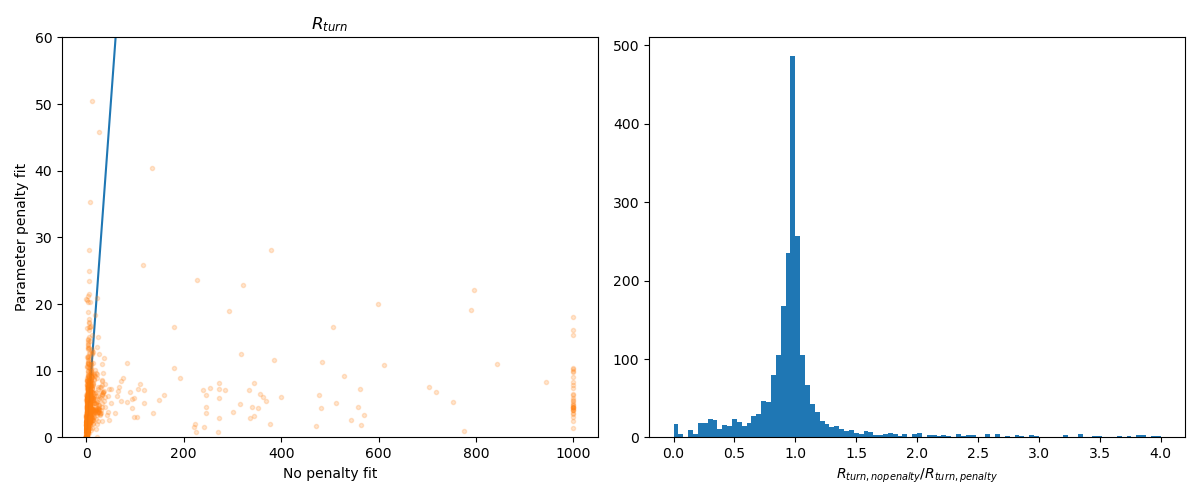

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [179]:
%matplotlib notebook

plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot([0,1000], [0,1000])
plt.plot(no_penalty_data['r_turn_used'], data['r_turn_used'], '.', alpha=0.2)

plt.ylim((0,60))

plt.xlabel('No penalty fit')
plt.ylabel('Parameter penalty fit')
plt.title('$R_{turn}$')


plt.subplot(122)
plt.hist(no_penalty_data['r_turn_used']/data['r_turn_used'], bins=100, range=(0,4))

plt.xlabel('$R_{turn, no penalty}$/$R_{turn, penalty}$')

plt.tight_layout();

In [182]:
no_penalty_data[np.logical_and(no_penalty_data['r_turn_used']/data['r_turn_used'] < 0.5, 
                               no_penalty_data['v_max_used'] < 90000)]

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,CMD_class,Mstar_turn,SFR,sSFR,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8984,12702,2245,523,54208,484403,203.5956974360575,27.461341240864517,0.8541006445884705,176.71435546875,0.03912948817014694,2755893248.0,0.0,70.16041363317305,2.5374875714449003,22.89882976147053,73.13262664300251,62.91963146977331,74.1315388323536,2.6718205173048415,160.12655364270788,781040491.3660207,14.629956578015008,75.20293201732134,17.42678020275283,2.423773627215264,2.644761765152986,293.15261838560195,0.02821422927081585,0.00107269142092135,6540142157.177461,471434618.14453244,6482712798.922182,471434618.14453244,57429358.25527865,112.88151210232826,8.208948044464702,-18.95944595336914,2.3811593633344765,0.1782651863934485,2.5288870334609777,0.1264442266603927,2.0613561188241825,0.36723686979726466,-99.0,-99.0,1.0,1,0,10.486605244962218,2.438326096335835,48.85876973093366,2244838,8.773849279214623,1.1687104403972626,0.49850478468899523,5.118494563877424,113.88151210232826,8.208948044464702,1.3273516696481813,1,1151394.7051478343,-0.14884735643863678,-9.604958534240723,83.35641282653955,126.04193133181982,-10.342641710151858,2.5288870334609777,74.1315388323536,83.35641282653955,160.12655364270788
8449,6102,2489,35,53857,515441,168.29919573818754,23.257760235983646,0.4185950458049774,89.5811767578125,0.023343093693256378,990454592.0,0.0,105.25842327761117,5.9159259693049835,8.731258162416468,5.615974794981122,4.922739665809233,105.59717142319828,13.549603904539481,8.163629539423939,7.539799438454998,31.455286930443698,113.92833170610275,6.342593912663539,8.510068226363908,6.2590751673482865,20.717176061996472,0.020829828456044197,0.00108624753737427,11361873949.820095,1277161568.8349228,9710894005.99847,1277161568.8349228,1650979943.8216238,5.881897016580391,0.7735778824051607,-17.698993682861328,2.8528339373650913,0.15024300005128707,3.2656870844141936,0.38386846262014274,2.7401388986993953,0.16304917268695837,-99.0,-99.0,1.0,0,0,0.49227396658092326,3.14552869304437,2.0717176061996474,2318922,-99.0,1.8832340836524963,0.3605482717520858,4.4105965684871675,6.881897016580392,0.7735778824051607,1.4921022896886649,1,185564044.93728453,-1.0278195142745972,-10.171982765197754,249.28998653714618,178.73138196083138,-9.40924551608606,2.8528339373650913,105.25842327761117,178.73138196083138,8.731258162416468
8947,12705,966,223,52642,184379,172.4264193063212,48.9701979766547,0.15208125114440918,80.4215087890625,0.046070124953985214,10521921536.0,1.0,228.5082438906526,15.52041961609652,3.121891200552616,0.8554320224937478,50.154950411856916,196.98665680398136,8.025787333030209,4.48189939502659,1.3623846271099354,51.42327649119717,278.7753188401996,42.03553

## $V_{max}$

<IPython.core.display.Javascript object>


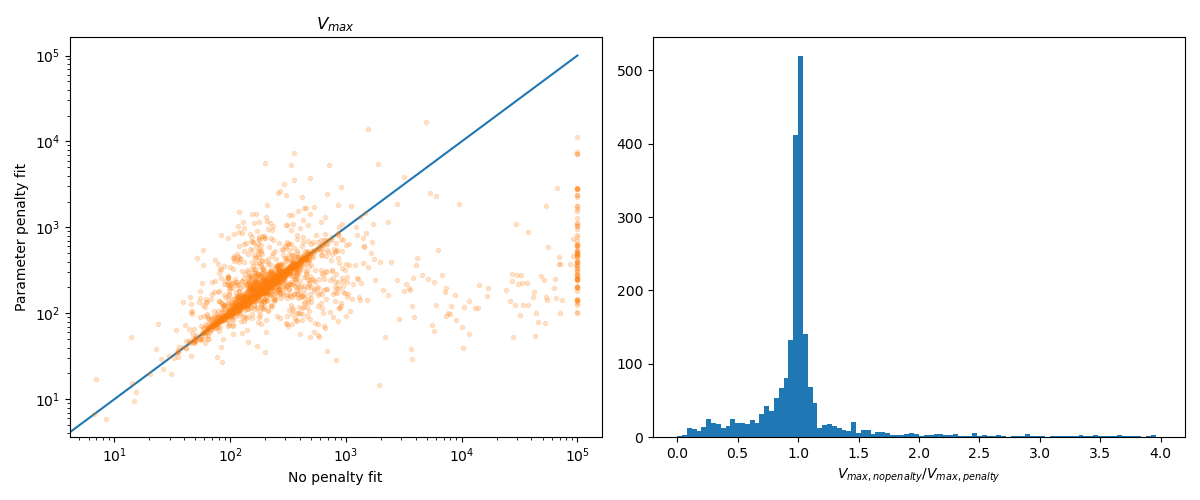

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [180]:
%matplotlib notebook

plt.figure(figsize=(12,5))


plt.subplot(121)
plt.loglog([0,100000], [0,100000])
plt.loglog(no_penalty_data['v_max_used'], data['v_max_used'], '.', alpha=0.2)

#plt.ylim((0,40000))

plt.xlabel('No penalty fit')
plt.ylabel('Parameter penalty fit')
plt.title('$V_{max}$')


plt.subplot(122)
plt.hist(no_penalty_data['v_max_used']/data['v_max_used'], bins=100, range=(0,4))

plt.xlabel('$V_{max, no penalty}$/$V_{max, penalty}$')

plt.tight_layout();

In [183]:
no_penalty_data[no_penalty_data['v_max_used']/data['v_max_used'] < 0.5]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,CMD_class,Mstar_turn,SFR,sSFR,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8984,12702,2245,523,54208,484403,203.5956974360575,27.461341240864517,0.8541006445884705,176.71435546875,0.03912948817014694,2755893248.0,0.0,70.16041363317305,2.5374875714449003,22.89882976147053,73.13262664300251,62.91963146977331,74.1315388323536,2.6718205173048415,160.12655364270788,781040491.3660207,14.629956578015008,75.20293201732134,17.42678020275283,2.423773627215264,2.644761765152986,293.15261838560195,0.02821422927081585,0.00107269142092135,6540142157.177461,471434618.14453244,6482712798.922182,471434618.14453244,57429358.25527865,112.88151210232826,8.208948044464702,-18.95944595336914,2.3811593633344765,0.1782651863934485,2.5288870334609777,0.1264442266603927,2.0613561188241825,0.36723686979726466,-99.0,-99.0,1.0,1,0,10.486605244962218,2.438326096335835,48.85876973093366,2244838,8.773849279214623,1.1687104403972626,0.49850478468899523,5.118494563877424,113.88151210232826,8.208948044464702,1.3273516696481813,1,1151394.7051478343,-0.14884735643863678,-9.604958534240723,83.35641282653955,126.04193133181982,-10.342641710151858,2.5288870334609777,74.1315388323536,83.35641282653955,160.12655364270788
8449,6102,2489,35,53857,515441,168.29919573818754,23.257760235983646,0.4185950458049774,89.5811767578125,0.023343093693256378,990454592.0,0.0,105.25842327761117,5.9159259693049835,8.731258162416468,5.615974794981122,4.922739665809233,105.59717142319828,13.549603904539481,8.163629539423939,7.539799438454998,31.455286930443698,113.92833170610275,6.342593912663539,8.510068226363908,6.2590751673482865,20.717176061996472,0.020829828456044197,0.00108624753737427,11361873949.820095,1277161568.8349228,9710894005.99847,1277161568.8349228,1650979943.8216238,5.881897016580391,0.7735778824051607,-17.698993682861328,2.8528339373650913,0.15024300005128707,3.2656870844141936,0.38386846262014274,2.7401388986993953,0.16304917268695837,-99.0,-99.0,1.0,0,0,0.49227396658092326,3.14552869304437,2.0717176061996474,2318922,-99.0,1.8832340836524963,0.3605482717520858,4.4105965684871675,6.881897016580392,0.7735778824051607,1.4921022896886649,1,185564044.93728453,-1.0278195142745972,-10.171982765197754,249.28998653714618,178.73138196083138,-9.40924551608606,2.8528339373650913,105.25842327761117,178.73138196083138,8.731258162416468
8947,12705,966,223,52642,184379,172.4264193063212,48.9701979766547,0.15208125114440918,80.4215087890625,0.046070124953985214,10521921536.0,1.0,228.5082438906526,15.52041961609652,3.121891200552616,0.8554320224937478,50.154950411856916,196.98665680398136,8.025787333030209,4.48189939502659,1.3623846271099354,51.42327649119717,278.7753188401996,42.03553

## $\alpha$

<IPython.core.display.Javascript object>


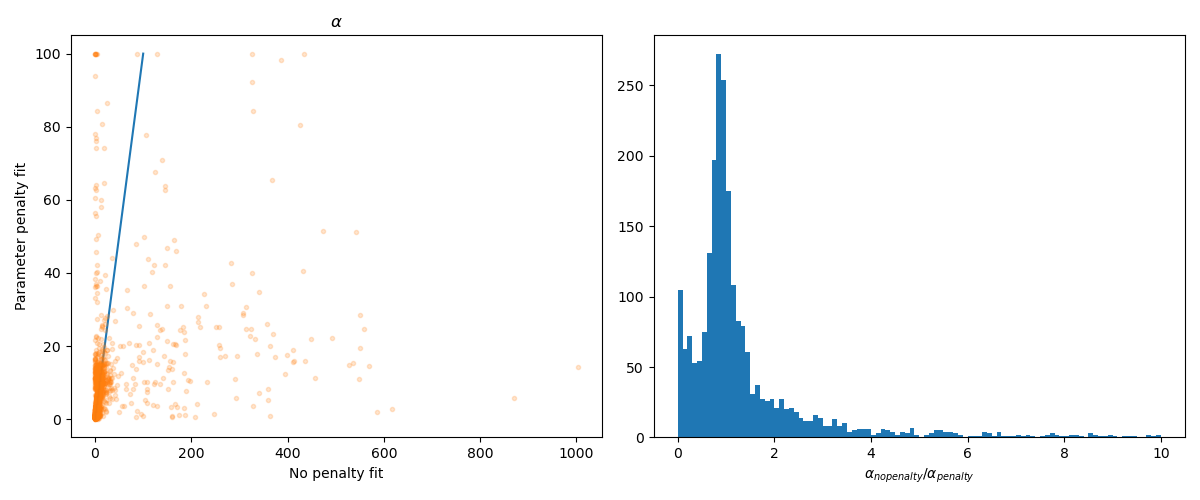

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [190]:
%matplotlib notebook

plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot([0,100], [0,100])
plt.plot(no_penalty_data['alpha_used'], data['alpha_used'], '.', alpha=0.2)

#plt.ylim((0,10))

plt.xlabel('No penalty fit')
plt.ylabel('Parameter penalty fit')
plt.title(r'$\alpha$')


plt.subplot(122)
plt.hist(no_penalty_data['alpha_used']/data['alpha_used'], bins=100, range=(0,10))

plt.xlabel(r'$\alpha_{no penalty}$/$\alpha_{penalty}$')

plt.tight_layout();

In [189]:
no_penalty_data[no_penalty_data['alpha_used']/data['alpha_used'] < 0.5]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,CMD_class,Mstar_turn,SFR,sSFR,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,r_turn_used,v_max_used,v_max_data_used,alpha_used
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8466,3704,1365,395,53062,271835,169.51344705905626,45.11302884764515,0.7605966925621033,38.829132080078125,0.10723754018545151,197521702912.0,-9.0,622.1887648555014,26.97096610599097,5.423761285411635,2.570250023574535,29.428355278182213,703.0027914804017,22.957781136072906,111.25988407852722,279025538.0736523,107.87212417532677,1413.3022561912169,2866494.8408711716,17.794157576987143,227764225.47207126,687.4634568697244,0.19382250308990479,0.00374262968525048,1262606913915.6963,109464301987.21436,928713396614.2489,109464301987.21436,333893517301.4474,2.7814657922087878,0.3278419505473275,-22.550582885742188,6.147730102904455,0.44972629040355266,5.394206738420233,0.21327110423718587,28.507395174961513,57839.744588374684,-99.0,-99.0,1.0,0,2,7.357088819545553,26.968031043831694,171.8658642174311,1238769,-99.0,2.2696952521800995,0.3984819734345351,14.027650044796358,3.7814657922087878,0.3278419505473275,2.000058917217074,2,62767763578.70069,-99.0,-99.0,781.0113415220086,852.3600886325648,-31.43738195467922,6.147730102904455,622.1887648555014,852.3600886325648,5.423761285411635
8249,3702,899,202,52620,164473,137.03265262994884,45.92096195150727,0.4280976951122284,47.86474609375,0.02679748833179474,4316812800.0,0.0,470.17155751503515,1764.5963567538108,0.9114709790034429,1.632624280324924,1.0792643567173899,34.92250964449018,1.714344719842902,137.1392992341442,579174444.6396726,3.3911074849327174,242.99019897544017,3887704333.4850802,171.2340152243181,0.0,26.156873020790904,0.08108656108379364,0.00201356164064311,180170543139.84866,1352392670031.6855,165985843226.1657,1352392670031.6855,14184699913.682957,11.701752186244782,95.34164827323065,-18.68962860107422,13.156762781102165,45.537164179135054,1.3032636040779486,0.18480939543790068,5.718307576497459,91489655.31072567,-99.0,-99.0,1.0,0,0,0.17987739278623163,0.5651845808221195,4.359478836798484,831037,8.984175177316411,2.073540985584259,0.07431796801505174,3.5053563122378297,12.701752186244782,95.34164827323065,1.481725305076537,2,8199197485.337716,0.0772257074713707,-9.959590911865234,39.338789135570636,90.5359425921002,-10.491716704738925,13.156762781102165,470.17155751503515,90.5359425921002,0.9114709790034429
8462,3703,1276,149,53035,246403,146.42274855860532,37.451285541014165,0.9052937030792236,94.37518310546875,0.022340497002005577,658126464.0,0.0,172.2573085610426,282.47192256931055,2.7432513548750865,12.65732596114342,25.75491729661529,128.14578216812205,38.589738308337274,4.829384687535426,5.561350903837118,37.87432499964117,189.18213800582396,121.67504563568734,4.462613389091592,10.0481628118382

## Distribution of loss

<IPython.core.display.Javascript object>


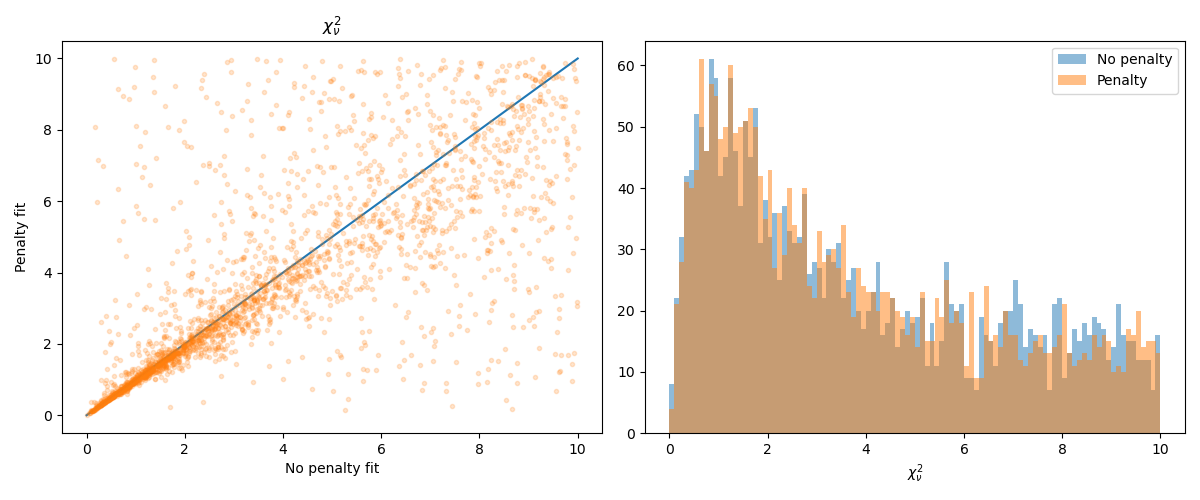

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [233]:
%matplotlib notebook

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot([0,10], [0,10])
plt.plot(no_penalty_data['chi2ndf_used'], data['chi2ndf_used'], '.', alpha=0.2)

plt.xlabel('No penalty fit')
plt.ylabel('Penalty fit')
plt.title(r'$\chi^2_{\nu}$')



plt.subplot(122)
plt.hist(no_penalty_data['chi2ndf_used'], bins=100, alpha=0.5, label='No penalty')
plt.hist(data['chi2ndf_used'], bins=100, alpha=0.5, label='Penalty')

plt.xlabel(r'$\chi^2_{\nu}$')

plt.legend()

plt.tight_layout();